<a href="https://colab.research.google.com/github/FerminMendez/ModuleAI/blob/main/Statistic/Workshop5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Interepretación de coeficientes beta

En una regresión lineal simple tenemos que
B1 es tanto la medida de linearidad como la sensibilidad de la variable dependiente respecto a la independientes.
B0 es el valor esperado cuando la variable dependiente es 0

Como el modelo de regresión lineal, los coeficientes son una combinación linear de las variables independientes. Por el Teórema del limite central tenemos que los coeficiente tienen un error estándar y podemos predecir cómo varian.

Si los valores de Bi con i>0 es 0 significan que la variable independiente xi no guarda relación con la variable independiente y.

In [12]:
import yfinance as yf
import numpy as np
import pandas as pd


In [13]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Getting price data and selecting adjusted price columns:
sprices = yf.download(tickers=['ALFAA.MX','^MXX'], start="2018-01-01",interval="1mo")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAA','MXX']

[*********************100%%**********************]  2 of 2 completed


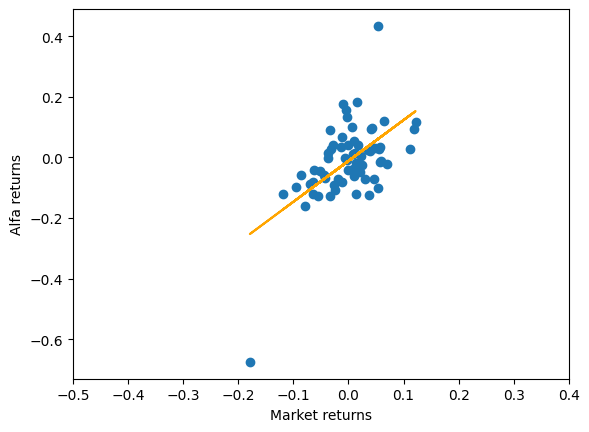

In [14]:
# Scatter plots can be misleading when ranges of X and Y are very different.
# In this case, Alfa had a very bad month in the COVID crisis with more than 60% loss!!
# Then, we can re-do the scatter plot trying to make the X and Y axis using the same range of values
plt.clf()
x=sr['MXX']
y = sr['ALFAA']
plt.scatter(x, y)
# Now I add the regression line:
b1,b0 = np.polyfit(x,y,1)
yfit = b0+b1*x

plt.plot(x, yfit,c="orange")

plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

TypeError: ignored

<Figure size 640x480 with 0 Axes>

4.2 regresion OLS methos

In [17]:
import statsmodels.api as sm
X = sm.add_constant(x)

mkmodel = sm.OLS(y,X).fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     32.02
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.71e-07
Time:                        02:55:13   Log-Likelihood:                 57.341
No. Observations:                  67   AIC:                            -110.7
Df Residuals:                      65   BIC:                            -106.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0117      0.013     -0.918      0.3

In [18]:
# Another way to run the same model using the ols function (instead of the OLS function):
import statsmodels.formula.api as smf

mkmodel2 = smf.ols('ALFAA ~ MXX',data=sr).fit()

print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     32.02
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.71e-07
Time:                        02:55:15   Log-Likelihood:                 57.341
No. Observations:                  67   AIC:                            -110.7
Df Residuals:                      65   BIC:                            -106.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0117      0.013     -0.918      0.3

In [19]:
# Using matrix algebra to estimate the beta coefficients:
sr['constant'] = 1
selcols = ['constant','MXX']
x = sr[selcols].values
y = sr['ALFAA'].values

xtx = np.matmul(x.transpose(),x)
xty = np.matmul(x.transpose(),y)
invtxt = np.linalg.inv(xtx)

betas = np.matmul(invtxt,xty)
betas

array([-0.01170755,  1.34889502])